<a href="https://colab.research.google.com/github/binaria010/Mate2B/blob/main/Clase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion lineal generalizada (o minimos cuadrados con pesos)

Ahora vamos a resolver el problema de hacer ajustes mas generales. Es decir, para un conjunto de datos ajustar una funcion $f(x)$ no necesariamente lineal.

La idea es transformar la variable $y$ (la que uno desea predecir) con una funcion $h$ de tal forma que $z = h(y)$ tenga una relacion lineal con $x$ (la variable predictora). 

Por ejemplo si 

* $f(x) = ke^{bx}$ entonces tomamos $h(y) = \log(y)$ luego

$$
z = \log(y) =\log(f(x)) = \log(ke^{bx}) = \log(k) + bx
$$

y hacemos una regresion para los datos $(x, z)$


Similarmente si 

* $f(x) = \frac{1}{a + bx}$, entonces tomamos $h(y) = \frac{1}{y}$ luego

$$
z = \frac{1}{y} = \frac{1}{f(x)} = a + bx
$$

y hacemos una regresion para los datos $(x, z)$

Podria ser necesario aplicar transformaciones a la variable predictora, por ejemplo:

* $f(x) = ax^b$ entonces como $ax^b = e^{\log(a) + b\log(x)}$ tomamos como $h(y)= \log(y)$ y tomamos como variable predictora $t = \log(x)$ entonces tenemos la siguiente relacion lineal:

$$
z = \log(y) = \log(f(x)) = \log(a) = b\log(x) = \log(a) + bt
$$

y hacemos una regresion lineal a los datos $(t, z)$.



En el caso que tenemos que transformar la variable $y$ mediante una funcion $h$ podemos hacer dos tipos de regresiones: una regresion comun y otra que sea con pesos $w_i = \frac{1}{h'(y_i)^2}$

## Ejercicio 1:

Dados los datos
<table>
   <tr> 
  <td>$x$  </td>
  <td>0.39</td>
  <td>0.69</td>
  <td>0.71</td>
  <td>0.55</td>
  <td>0.43</td>
  <td>0.45</td>
  <td>0.31</td>
  <td>0.58</td>
  <td>0.91</td>
  <td>0.14</td>
  </tr>
  <tr>
  <td> $y$ </td>
  <td>0.85</td>
  <td>0.56</td>
  <td>0.55</td>
  <td>0.51</td>
  <td>0.76</td>
  <td>0.72</td>
  <td>1.3</td>
  <td>0.67</td>
  <td>0.43</td>
  <td>2.04</td>    
  </tr>
  

</table>



Hacer un ajuste de la forma $f(x)= \frac{1}{a + bx}$

* Usando minimos cuadrados

* Usando minimos cuadrados con pesos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
def reglineal(x, y):

  """
  Esta funcion calcula los coeficientes de una regresion lineal simple. Devuelve la funcion a + bx 
  Inputs:
  x : numpy array dimension n
  y : numpy array dimension n

  Return:
  f : poly1D: objeto polinomio de python. f es un polinomio de grado 1: alpha* +beta*x
  """
  n = len(x)
  X = np.ones((n,2))

  X[:, 1] = x

  coefs =  np.linalg.solve(X.T @ X, np.dot(X.T, y))

  a = coefs[0]
  b = coefs[1]

  f = np.poly1d([b, a])

  return f


def reglinealPesos(x, y, w):

  """
  devuelve la recta de regresion lineal pero teniendo en cuenta los pesos w_i de cada obs
  """

  n = len(x)
  W = np.diag(w)
  X = np.ones((n,2))

  X[:, 1] = x

  coefs = np.linalg.solve(X.T @ W @ X, np.dot(X.T @ W, y))

  a = coefs[0]
  b = coefs[1]

  f = np.poly1d([b, a]) 

  return f

def error_reglineal(f,x,y):
  '''
  PAra un ajuste f del consjunto de datos x,y esta funcion calcula el error en el ajuste
  '''

  y_predicho = f(x)
  avg_y = np.mean(y)

  error = np.mean((y_predicho - avg_y)**2)

  return error


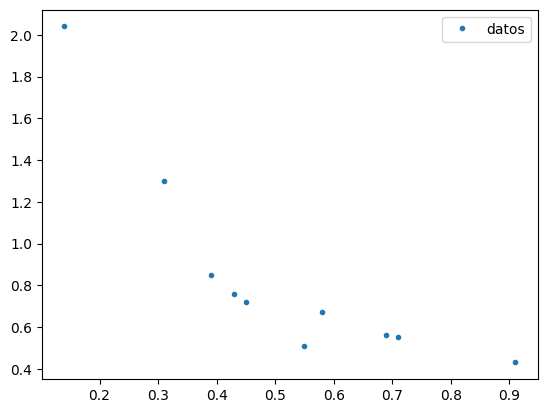

In [ ]:
x = np.array([0.39, 0.69, 0.71, 0.55, 0.43, 0.45, 0.31, 0.58, 0.91, 0.14])
y = np.array([0.85, 0.56, 0.55, 0.51, 0.76, 0.72, 1.3, 0.67, 0.43, 2.04])

plt.plot(x, y, ".", label = "datos")
plt.legend()
plt.show()

La funcion de ajuste es: 
1/  
2.378 x + 0.2251
El error del ajuste sin pesos es:  0.6249715283636816


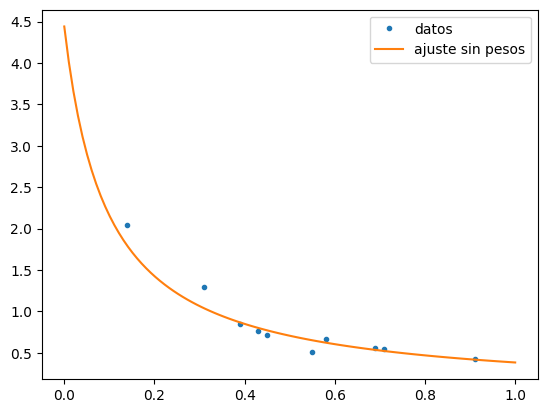

In [ ]:
# reg lineal generalizada
h =lambda y: 1/y
# calculo z:
z = h(y)

hinv = h

f = reglineal(x, z)

print("La funcion de ajuste es: \n1/", f)

error_lineal = error_reglineal(f, x, y)
print("El error del ajuste sin pesos es: ", error_lineal)

grilla = np.linspace(0,1, 100)
plt.plot(x, y, ".", label = "datos")
plt.plot(grilla, hinv(f(grilla)), label = "ajuste sin pesos")
plt.legend()
plt.show()

La funcion de ajuste con pesos es: 

1/  
2.359 x + 0.1517


El error del ajuste con pesos es:  0.5254972953005959


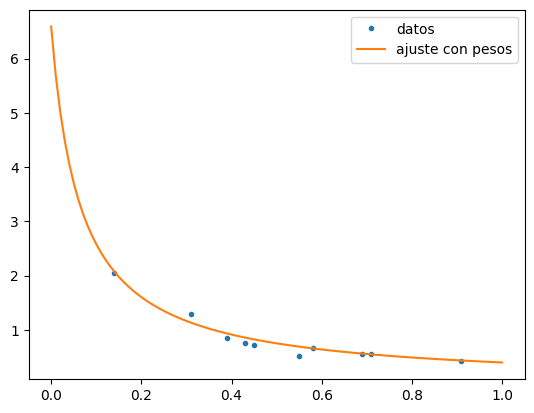

In [ ]:

# Para calcular los pesos
derh = lambda y: -1/y**2
pesos = (1/derh(y))**2


f_pesos = reglinealPesos(x, z, pesos)

print("La funcion de ajuste con pesos es: \n\n1/", f_pesos)


error_lineal_pesada = error_reglineal(f_pesos, x, y)

print("\n\nEl error del ajuste con pesos es: ", error_lineal_pesada)

plt.plot(x, y, ".", label = "datos")
plt.plot(grilla, hinv(f_pesos(grilla)), label = "ajuste con pesos")
plt.legend()
plt.show()

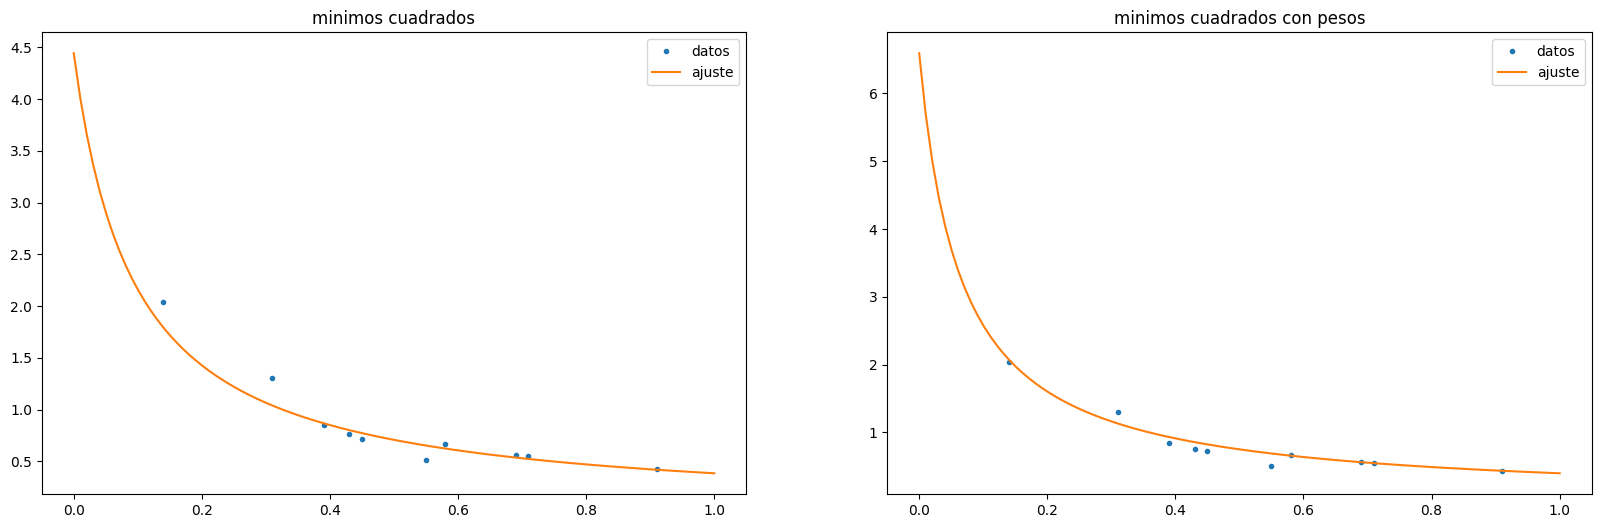

In [ ]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.plot(x, y, ".", label = "datos")
plt.plot(grilla, hinv(f(grilla)), label = "ajuste")
plt.title("minimos cuadrados")
plt.legend()

plt.subplot(122)
plt.plot(x, y, ".", label = "datos")
plt.plot(grilla, hinv(f_pesos(grilla)), label = "ajuste")
plt.title("minimos cuadrados con pesos")
plt.legend()


plt.show()

## Ejercicio:  Agregamos dificultad!

Hacer el ejercicio 10

In [ ]:
x = # completar
y = # completar

# transformo y
h = lambda y: #completar
z = h(y)

# transformo x
t = # completar






In [ ]:
# regresion sin pesos:

f = reglineal(#completar)

# calcular el error

error_reg = # completar

In [ ]:
# reg con pesos

f_pesos = reglinealPesos(# completar)

# calcular el error

error_reg_pesos =  #completar

In [ ]:
# Hacer un plot de ambas regresiones junto con los datos 